# Data Understanding

In [ ]:
#LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

interpretasi:

mengimport library yang diperlukan

In [ ]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path ='/content/drive/MyDrive/tahap-penyisihan-oq-dataquestua/train.csv'
train = pd.read_csv('/content/drive/MyDrive/Daladida/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Daladida/test.csv')
#oad_data_cr =pd.read_csv(path)
load_data_cr

In [ ]:
# Hitung statistik deskriptif
deskriptif = train.describe()

# Cetak hasil
print(deskriptif)

                id  Alkalinity, total       Calcium     Chloride     Fluoride  \
count  6400.000000        6400.000000   6400.000000  6400.000000  6400.000000   
mean   3199.500000         167.151047     69.350432    53.213620     0.333625   
std    1847.665193          83.157803   1052.136452    92.934505     0.452473   
min       0.000000          12.000000      0.610000     0.580000     0.049000   
25%    1599.750000         110.000000     25.000000    11.000000     0.140000   
50%    3199.500000         153.500000     45.000000    28.000000     0.210000   
75%    4799.250000         209.000000     72.000000    62.000000     0.382250   
max    6399.000000        1000.000000  83000.000000  2100.000000     9.000000   

          Magnesium  Nitrate as N        Sodium  Specific Conductivity  \
count   6400.000000   6400.000000   6400.000000            6400.000000   
mean      23.446335      3.382707     62.437731             637.631953   
std      325.389503      4.878279    556.891904 

In [ ]:
persentil_75 = train['Sodium'].quantile(0.75)
rata2 = np.mean(test['Alkalinity, total'])
rata2
#kondisi1
kondisi1 = train['Sodium']> persentil_75

#kondisi2
kondisi2 = train['Alkalinity, total']>rata2

# Ambil data di atas rata-rata
data_diatas_rata = train[kondisi1 & kondisi2]
meani = np.mean(data_diatas_rata['Hardness'])
# Cetak hasil
print(meani)

383.22241976516636


menghitung nilai mean kesadahan dimana jika memiliki alkalinity diatas rata2 dan kadar sodium diatas 75 maka rata-rata kesadahan sebesar 383.22 yang bermakna jika air memiliki alkalinity diatas rata2 dan kadar sodium diatas persentil 75 maka Kadar kesadahan tersebut memenuhi standar parameter kesadahan untuk persyaratan kualitas air minum menurut Permenkes nomor 492/Menkes/IV/2010 yaitu sebesar < 500 mg/L

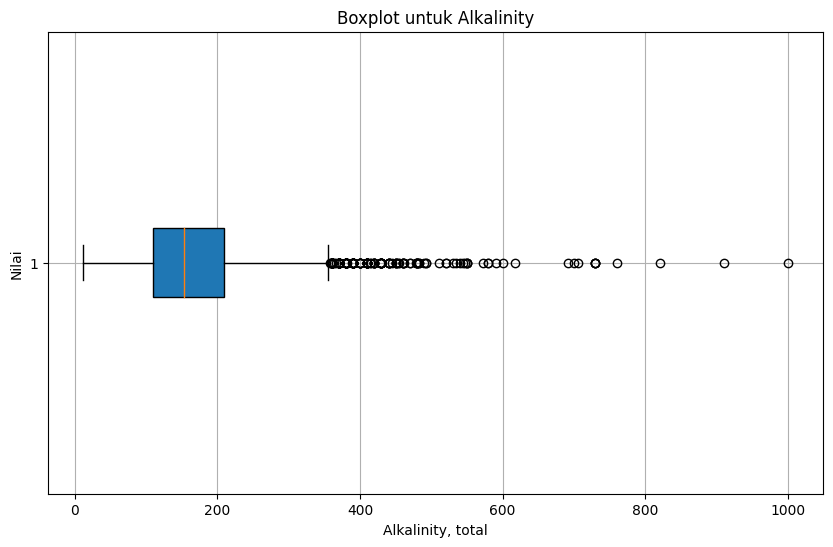

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Kolom yang ingin dianalisis
kolom = 'Alkalinity, total'

# Buat plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(train['Alkalinity, total'], vert=False, patch_artist=True)  # Atur orientasi horizontal
plt.xlabel(kolom)
plt.ylabel("Nilai")
plt.title(f"Boxplot untuk {'Alkalinity'}")
plt.grid(True)
plt.show()

In [ ]:
train.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


penjelasan:

didapati bahwa terdapat 21 atribut untuk prediksi cuaca pada IKN maka diperlu pengecekan apakah terjadi missinvalue data

In [ ]:
train.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

penjelasan:

pada data train pengecekan missing value tidak dapati missing value

In [ ]:
test.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
dtype: int64

penjelasan:

pada data train pengecekan missing value tidak dapati missing value

In [ ]:
#membuat data frame
#agar tidak memenuhi source
df_test = pd.DataFrame(test)
df_test

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1601 non-null   int64  
 1   Alkalinity, total       1601 non-null   float64
 2   Calcium                 1601 non-null   float64
 3   Chloride                1601 non-null   float64
 4   Fluoride                1601 non-null   float64
 5   Magnesium               1601 non-null   float64
 6   Nitrate as N            1601 non-null   float64
 7   Sodium                  1601 non-null   float64
 8   Specific Conductivity   1601 non-null   float64
 9   Sulfate                 1601 non-null   float64
 10  Total Dissolved Solids  1601 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.7 KB


In [ ]:
#membuat data frame
#agar tidak memenuhi source
df_train = pd.DataFrame(train)
df_train

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


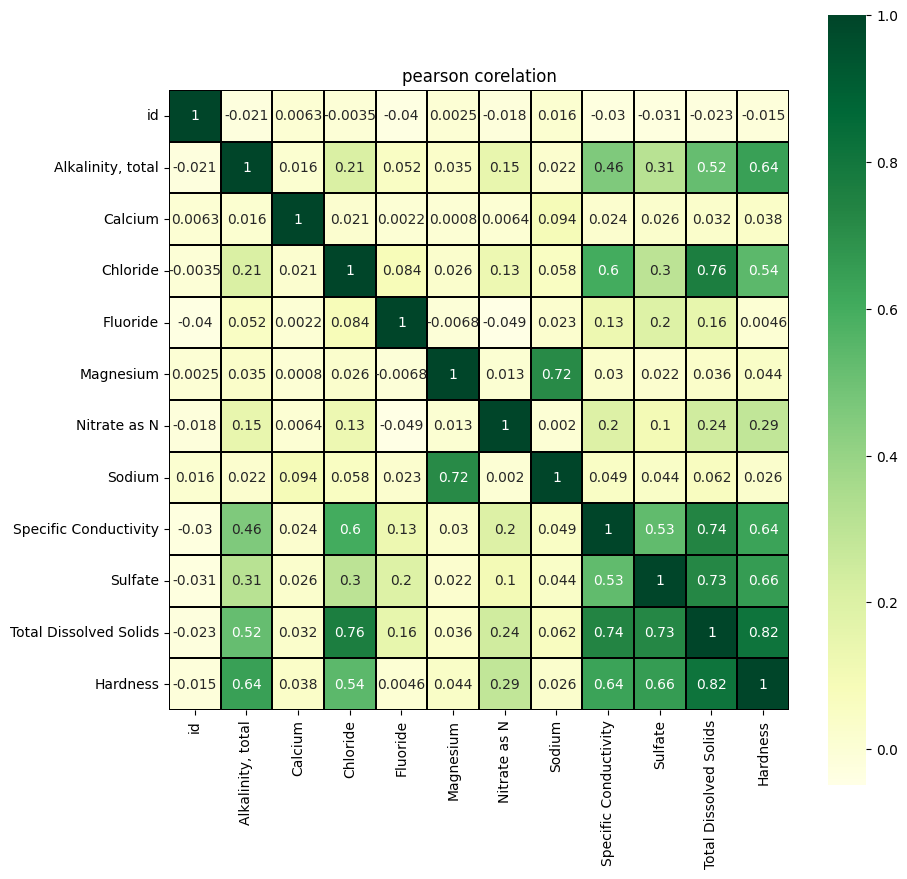

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
plt.title('pearson corelation')
sns.heatmap(df_train.astype(float).corr(),linewidth=0.25, vmax =1.0,square =True,cmap='YlGn', linecolor='black', annot=True)
plt.show()

penjelasan:

kesadahan air memiliki korelasi yang tinggi terhadap total disolved solid dan positif, sedangkan kesadahan air memiliki korelasi lemah pada flouride akibat perbedaan pembentuk senyawanya

# Data Preparation

## Data Cleaning Train

In [ ]:
#membuat fungsi untuk menghitung tingkat missing pada data
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
df_train.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

penjelasan:

terdapat pada atribut visibility, sea_level, grnd_level, rain_3h, snow_1h, snow_3h tedapat missing value maka diperlu cek missing percent train

In [ ]:
missing_percent_train = get_numerical_summary(df_train)
missing_percent_train

{}

In [ ]:
df_train.columns

Index(['id', 'Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride',
       'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity',
       'Sulfate', 'Total Dissolved Solids', 'Hardness'],
      dtype='object')

In [ ]:
# export as download if in colab
from google.colab import files
df_train.to_csv('train_daladida.csv')
files.download('train_daladida.csv')
print("berhasil train dijadikan csv!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

berhasil train dijadikan csv!


## Data Cleaning Test

In [ ]:
df_test.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
dtype: int64

In [ ]:
missing_percent_test = get_numerical_summary(df_test)
missing_percent_test

{}

In [ ]:
df_test.columns

Index(['id', 'Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride',
       'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity',
       'Sulfate', 'Total Dissolved Solids'],
      dtype='object')

In [ ]:
# export as download if in colab
from google.colab import files
df_test.to_csv('test_ZigzagTeam.csv')
files.download('test_ZigzagTeam.csv')
print("berhasil test dijadikan csv!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

berhasil test dijadikan csv!


# PEMODELAN

## REGRESI LINIEAR

In [ ]:
df_train.columns

Index(['id', 'Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride',
       'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity',
       'Sulfate', 'Total Dissolved Solids', 'Hardness'],
      dtype='object')

In [ ]:
df_pemodelan = df_train.copy()

In [ ]:
df_pemodelan= df_pemodelan.drop(['id'],axis=1)
df_pemodelan.head()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [ ]:
seed =50
LABEL = 'Hardness'
X, y = df_pemodelan.drop(columns=[LABEL]), df_pemodelan[LABEL]
X

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0
1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0
2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0
3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0
4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0
...,...,...,...,...,...,...,...,...,...,...
6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0
6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0
6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0
6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y , test_size=0.3, random_state=seed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
ln = LinearRegression()

# Training Model

# Memodelkan data
model_ln = ln.fit(X,y)

# Melakukan predict pada data test
pred_ln = model_ln.predict(X_test)

In [ ]:
# Nilai R2
print('R Square ',metrics.r2_score(y_test,pred_ln).round(3))

R Square  0.782


In [ ]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_ln))

78.17961882416493

## ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
# ReLU : fungsi aktivasi untuk memungkinkan model menyelesaikan masalah non linier
# ReLU (Rectified Linear Unit)
mlp = MLPRegressor(hidden_layer_sizes=(100,100),activation='relu',max_iter=10,learning_rate='constant')

# Memodelkan Data Menggunakan Algoritma ANN
model_mlp = mlp.fit(X, y)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(X_test)

In [ ]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_mlp))

47.71499989499485

## SVM

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature scaling (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the SVM regressor
svm_reg = SVR(kernel='linear')  # Linear kernel for linear data
svm_reg.fit(X_scaled, y)

SVR(kernel='linear')

In [ ]:
# Melakukan predict pada data test
pred_svm = svm_reg.predict(X_test)

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_svm))

49161.99901953645

## KNN

In [ ]:

#Here's the Python code for a K-Nearest Neighbors (KNN) regressor, incorporating best practices:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create and train the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Set k (number of neighbors)
knn_reg.fit(X, y)

# Make predictions on new data (scale it first)
pred_knn= knn_reg.predict(X_test)

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_knn))

# Nilai R2
print('R Square ',metrics.r2_score(y_test,pred_knn).round(3))

R Square  0.884


  ## XGBOOST

In [ ]:
from xgboost import XGBRegressor

#membuat object algoritma XGBoost
clf_xgr = XGBRegressor(n_estimators=10,max_depth=4,random_state=0, learning_rate=0.4)

#memodelkan data dengan algoritma XGBoost
model_xgr = clf_xgr.fit(X,y)

#melakukan predict pda data test
pred_xgr = model_xgr.predict(X_test)

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model_xgr.fit(X, y)
predictions = model_xgr.predict(X_test)

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_xgr))

39.40433079818621

## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Create and train the KNN regressor
model_bagging =  BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000)
model_bagging.fit(X, y)

# Make predictions on new data (scale it first)
pred_bagging= model_bagging.predict(X_test)

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_bagging))

# Nilai R2
print('R Square ',metrics.r2_score(y_test,pred_bagging).round(3))

R Square  0.865


## adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create and train the KNN regressor
model_ada =  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=100), n_estimators=500)
model_ada.fit(X, y)

# Make predictions on new data (scale it first)
pred_ada= model_ada.predict(X_test)

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pred_ada))

# Nilai R2
print('R Square ',metrics.r2_score(y_test,pred_ada).round(3))

R Square  1.0


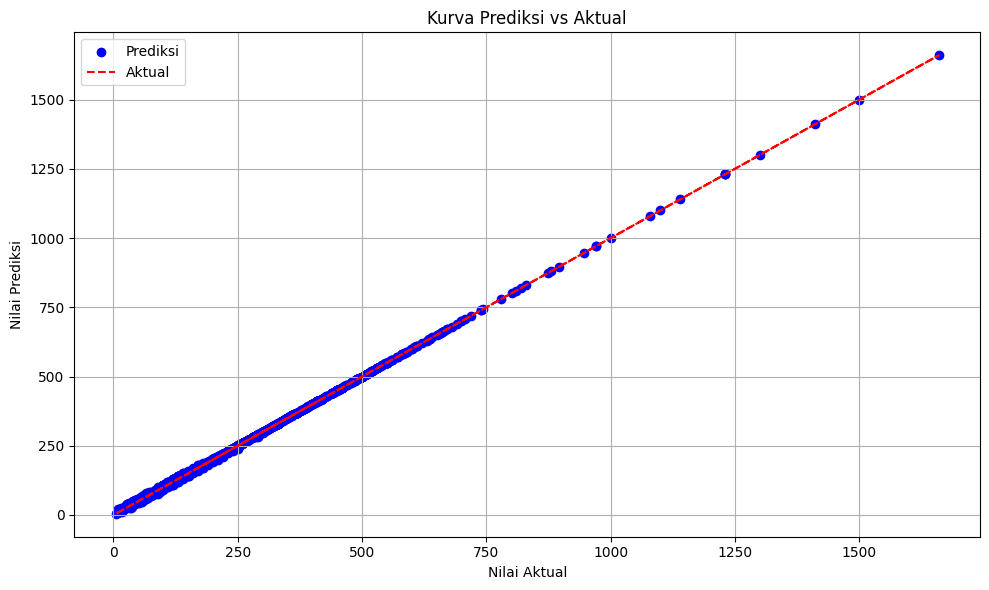

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data prediksi dan aktual

# Buat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_ada, color='blue', label='Prediksi')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Aktual')

# Set label dan judul
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Kurva Prediksi vs Aktual')


# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()


# prediksi

In [ ]:
df_pemodelan.columns

Index(['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium',
       'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate',
       'Total Dissolved Solids', 'Hardness'],
      dtype='object')

In [ ]:
x_testing = df_test[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium',
       'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate',
       'Total Dissolved Solids']]
prediction = model_ada.predict(x_testing).round(2)

In [ ]:
prediction

array([ 85., 130., 120., ..., 184., 250., 190.])

In [ ]:
df_prediction_ada = pd.DataFrame({'Hardness':prediction})
df_prediction_ada

,Hardness
0,85.0
1,130.0
2,120.0
3,100.0
4,312.0
...,...
1596,89.0
1597,54.0
1598,184.0
1599,250.0


In [ ]:
df_pred_Hardness = pd.concat([df_test,df_prediction_ada],sort=True, axis=1)
df_pred_Hardness

In [ ]:
df_pred_Hardness.columns

In [ ]:
df_pred_hardness = df_pred_Hardness.drop(columns=['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium',
       'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate',
       'Total Dissolved Solids'], axis=1)

In [ ]:
df_pred_hardness

In [ ]:
df_pred_hardness = df_pred_hardness.dropna()
df_pred_hardness

In [ ]:
# Menghapus indeks
df_pred_hardness = df_pred_hardness.reset_index(drop=True)

In [ ]:
# export as download if in colab
from google.colab import files
df_pred_hardness.to_csv('predict_daladidaadafix.csv',index =False)
files.download('predict_daladidaadafix.csv')
print("berhasil prediksi dijadikan csv!")

# Save Model

In [ ]:
import pickle
# Misalnya, jika model Anda disimpan dalam variabel 'model'
with open('model_daladida.pkl', 'wb') as file:
    pickle.dump(clf_xgr, file)

In [ ]:
files.download('model_daladida.pkl')